# Some EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Energy = pd.read_csv('../data/energy_dataset.csv')
Weather = pd.read_csv('../data/weather_features.csv')

print(list(Energy.keys()))
print(list(Weather.keys()))

['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']
['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all', 'weather_id', 'weather_main', 'we

## Valencia Data <br>

Getting valencia's temp data and removing duplicates

In [14]:
EnergySub = pd.DataFrame({
    'load': Energy['total load actual'],
    'time': Energy['time'],

})
WeatherSub = pd.DataFrame({
    'tempV': Weather.loc[Weather['city_name'] == 'Valencia', 'temp'],
    'timeW': Weather.loc[Weather['city_name'] == 'Valencia', 'dt_iso'],
})

for i in range(len(EnergySub)):
    if (WeatherSub.iloc[i]['timeW'] != EnergySub.iloc[i]['time']):
        WeatherSub.drop(i, axis=0, inplace=True)
        i -= 1

print(WeatherSub)
print(EnergySub)



         tempV                      timeW
0      270.475  2015-01-01 00:00:00+01:00
1      270.475  2015-01-01 01:00:00+01:00
2      269.686  2015-01-01 02:00:00+01:00
3      269.686  2015-01-01 03:00:00+01:00
4      269.686  2015-01-01 04:00:00+01:00
...        ...                        ...
35140  285.640  2018-12-31 19:00:00+01:00
35141  283.140  2018-12-31 20:00:00+01:00
35142  281.660  2018-12-31 21:00:00+01:00
35143  280.140  2018-12-31 22:00:00+01:00
35144  279.140  2018-12-31 23:00:00+01:00

[35064 rows x 2 columns]
          load                       time
0      25385.0  2015-01-01 00:00:00+01:00
1      24382.0  2015-01-01 01:00:00+01:00
2      22734.0  2015-01-01 02:00:00+01:00
3      21286.0  2015-01-01 03:00:00+01:00
4      20264.0  2015-01-01 04:00:00+01:00
...        ...                        ...
35059  30653.0  2018-12-31 19:00:00+01:00
35060  29735.0  2018-12-31 20:00:00+01:00
35061  28071.0  2018-12-31 21:00:00+01:00
35062  25801.0  2018-12-31 22:00:00+01:00
35063  2

Made sure that both dataframes are shaped the same

## Basic plot of above data

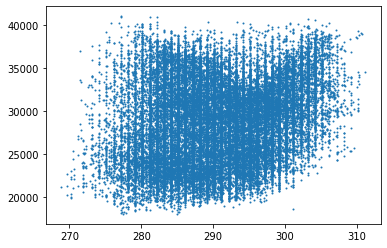

In [19]:
plt.scatter(WeatherSub['tempV'], EnergySub['load'], s=1)
plt.show()

Pretty cool stuff! Marked minimum of total load at ~=71F. After this value, there is a strong upward correlation in temperature, but below, when people would be using heaters, there is some more interesting stuff going on. Maybe look at nighttime vs daytime? Will have to do some string manip.

### Try a regression? TODO